In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

#### German Error Analysis

In [2]:
def plural_type_statistics(df):
    
    count_dic = {'e': {'pure': 0, 'ä':0, 'ö':0, 'ü': 0, 'all': 0}, 
                 'en_n':{'pure': 0, 'ä':0, 'ö':0, 'ü': 0, 'all': 0}, 
                 'er': {'pure': 0, 'ä':0, 'ö':0, 'ü': 0, 'all': 0}, 
                 '0': {'pure': 0, 'ä':0, 'ö':0, 'ü': 0, 'all': 0},
                 's': {'pure': 0, 'ä':0, 'ö':0, 'ü': 0, 'all': 0}}
    
    rep_stat = {}
    
    
    for i, row in df.iterrows():
        len_diff = len(row['labels']) - len(row['lemma'])
        
        suffix = row['labels'][-len_diff:] if len_diff != 0 else ''
        
        if suffix != '' and suffix[0] == row['lemma'][-1]:
            
            if suffix[0] not in rep_stat:
                rep_stat[suffix[0]] = 0
            else: 
                rep_stat[suffix[0]] += 1
                 
            suffix = suffix[1:]
            
            
    
        char_diff = set(row['labels']) - set(row['lemma']) 
        
        if suffix == 'e':
            count_dic['e']['all'] += 1
            
            if 'ä' in char_diff:
                count_dic['e']['ä'] += 1
                     
            elif 'ö' in char_diff:
                count_dic['e']['ö'] += 1
                   
            elif 'ü' in char_diff:
                count_dic['e']['ü'] += 1
                           
            else:
                count_dic['e']['pure'] += 1
                
        
        elif suffix == 'n' or suffix == 'en':
            count_dic['en_n']['all'] += 1
            
            if 'ä' in char_diff:
                count_dic['en_n']['ä'] += 1
                
            elif 'ö' in char_diff:
                count_dic['en_n']['ö'] += 1
            
            elif 'ü' in char_diff:
                count_dic['en_n']['ü'] += 1
            
            else:
                count_dic['en_n']['pure'] += 1 
    
        
        elif suffix == 'er':
            count_dic['er']['all'] += 1
            
            if 'ä' in char_diff:
                count_dic['er']['ä'] += 1
                
                
            elif 'ö' in char_diff:
                count_dic['er']['ö'] += 1
                
            
            elif 'ü' in char_diff:
                count_dic['er']['ü'] += 1
                
            
            else:
                count_dic['er']['pure'] += 1
        
        elif suffix == '':
            count_dic['0']['all'] += 1
            
            if 'ä' in char_diff:
                count_dic['0']['ä'] += 1
                   
            elif 'ö' in char_diff:
                count_dic['0']['ö'] += 1
                       
            elif 'ü' in char_diff:
                count_dic['0']['ü'] += 1
            
            else:
                count_dic['0']['pure'] += 1
        
        elif suffix == 's':
            count_dic['s']['all'] += 1
            
            if 'ä' in char_diff:
                count_dic['s']['ä'] += 1
            
            elif 'ö' in char_diff:
                count_dic['s']['ö'] += 1
            
            elif 'ü' in char_diff:
                count_dic['s']['ü'] += 1
            
            else:
                count_dic['s']['pure'] += 1
        else:
            print(row)
        
    return count_dic, rep_stat

In [4]:
## read the predictions and the test df to get the features
ger_df_generated_comparison = pd.read_csv('generated_words_ger.csv')
ger_df_test = pd.read_csv('data/deu.gold', sep='\t', names = ['lemma', 'labels', 'features'])
ger_prob_df = ger_df_test.merge(ger_df_generated_comparison.rename({'Expected': 'labels'}, axis=1), on='labels', how='left')

In [5]:
ger_correct_idx = [idx for idx, row in ger_prob_df.iterrows() if row['labels']==row['Predicted']]
ger_incorrect_idx = [idx for idx, row in ger_prob_df.iterrows() if row['labels']!=row['Predicted']]

In [6]:
plural_type_statistics(ger_prob_df)

({'e': {'pure': 119, 'ä': 40, 'ö': 7, 'ü': 16, 'all': 182},
  'en_n': {'pure': 217, 'ä': 0, 'ö': 0, 'ü': 0, 'all': 217},
  'er': {'pure': 9, 'ä': 4, 'ö': 3, 'ü': 1, 'all': 17},
  '0': {'pure': 149, 'ä': 4, 'ö': 0, 'ü': 0, 'all': 153},
  's': {'pure': 31, 'ä': 0, 'ö': 0, 'ü': 0, 'all': 31}},
 {'n': 5, 's': 2})

In [7]:
plural_type_statistics(ger_prob_df.loc[ger_incorrect_idx])

({'e': {'pure': 21, 'ä': 18, 'ö': 5, 'ü': 11, 'all': 55},
  'en_n': {'pure': 29, 'ä': 0, 'ö': 0, 'ü': 0, 'all': 29},
  'er': {'pure': 5, 'ä': 4, 'ö': 3, 'ü': 1, 'all': 13},
  '0': {'pure': 9, 'ä': 3, 'ö': 0, 'ü': 0, 'all': 12},
  's': {'pure': 14, 'ä': 0, 'ö': 0, 'ü': 0, 'all': 14}},
 {'n': 4, 's': 1})

In [8]:
plural_type_statistics(ger_prob_df.loc[ger_correct_idx])

({'e': {'pure': 98, 'ä': 22, 'ö': 2, 'ü': 5, 'all': 127},
  'en_n': {'pure': 188, 'ä': 0, 'ö': 0, 'ü': 0, 'all': 188},
  'er': {'pure': 4, 'ä': 0, 'ö': 0, 'ü': 0, 'all': 4},
  '0': {'pure': 140, 'ä': 1, 'ö': 0, 'ü': 0, 'all': 141},
  's': {'pure': 17, 'ä': 0, 'ö': 0, 'ü': 0, 'all': 17}},
 {'n': 0, 's': 0})

#### Turkish Error Analysis

In [9]:
## figure size can be adjusted
def plot_feats(x, y, feats, x_label=None, y_label=None, save_name=None):
    plt.figure(figsize=(6.5, 6.5))
    plt.scatter(x, y)
    for i in range(len(x)):
        plt.annotate(feats[i], xy = (x[i], y[i]), xytext = (x[i]+0.0005, y[i]+0.0005))
    
    if x_label!=None and y_label!=None:
        plt.xlabel(x_label)
        plt.ylabel(y_label)
    if save_name!=None:
        plt.savefig(save_name)
    plt.show()

In [10]:
tur_df_generated_comparison = pd.read_csv('generated_words_tur.csv')
tur_df_test = pd.read_csv('data/tur.gold', sep='\t', names = ['lemma', 'labels', 'features'])
tur_df_train = pd.read_csv('data/tur_large.train', sep='\t', names = ['lemma', 'labels', 'features'])
tur_prob_df = tur_df_test.merge(tur_df_generated_comparison.rename({'Expected': 'labels'}, axis=1), on='labels', how='left')
tur_correct_idx = [idx for idx, row in tur_prob_df.iterrows() if row['labels']==row['Predicted']]
tur_incorrect_idx = [idx for idx, row in tur_prob_df.iterrows() if row['labels']!=row['Predicted']]

In [11]:
# word types N/V/ADJ count in the test set
word_type_count = Counter([feature.split(';')[0] for feature in tur_df_test['features']])
incorrect_word_type_count = Counter([feature.split(';')[0] for feature in tur_df_test.loc[tur_incorrect_idx].features])

In [12]:
print(word_type_count, incorrect_word_type_count)

Counter({'V': 1446, 'N': 538, 'ADJ': 16}) Counter({'V': 215, 'N': 173, 'ADJ': 5})


In [13]:
# count the number of each feature in the training data
train_feature_list = []
for feature in tur_df_train.features:
    train_feature_list.extend(feature.split(';')[1:])
train_feat_count = Counter(train_feature_list)

In [14]:
# count the average lemma length and label length of each feature in the training set
train_word_len = {}

for i, row in tur_prob_df.iterrows():
    
    for k in train_feat_count.keys():
        
        if k in row['features']:
            if k not in train_word_len:
                train_word_len[k] = {'lemma_len': [], 'label_len': []}
            else:
                train_word_len[k]['lemma_len'].append(len(row['lemma']))
                train_word_len[k]['label_len'].append(len(row['labels']))  
                
for v in train_word_len.values():
    v['avg_lemma_len'] = np.mean(v['lemma_len'])
    v['avg_label_len'] = np.mean(v['label_len'])

In [15]:
# Count the numbers of the features (total&correct&incorrect) in the test set

test_feature_list = []
for feature in tur_df_test.features:
    test_feature_list.extend(feature.split(';')[1:])

test_correct_feature_list = []
for feature in tur_df_test.loc[tur_correct_idx].features:
    test_correct_feature_list.extend(feature.split(';')[1:])

test_incorrect_feature_list = []
for feature in tur_df_test.loc[tur_incorrect_idx].features:
    test_incorrect_feature_list.extend(feature.split(';')[1:])


In [16]:
## feature freq in the training data, test accuracy, averger lemma len, average label length
test_feat_acc = {}
test_feat_inc = {}
test_feat_count = Counter(test_feature_list)
for k, v in Counter(test_correct_feature_list).items():
    test_feat_acc[k] = (train_feat_count[k]/len(tur_df_train), v/test_feat_count[k], train_word_len[k]['avg_lemma_len'], train_word_len[k]['avg_label_len'])

In [17]:
freqs = [v[0] for v in Counter(test_feat_acc).values()]
accs =  [v[1] for v in Counter(test_feat_acc).values()]
lemma_lens = [v[2] for v in Counter(test_feat_acc).values()]
label_lens = [v[3] for v in Counter(test_feat_acc).values()]
feats = [k for k in Counter(test_feat_acc).keys()]

In [18]:
# An example
test_feat_acc['PROG']

(0.19385714285714287,
 0.8913043478260869,
 8.769392033542976,
 21.257861635220127)

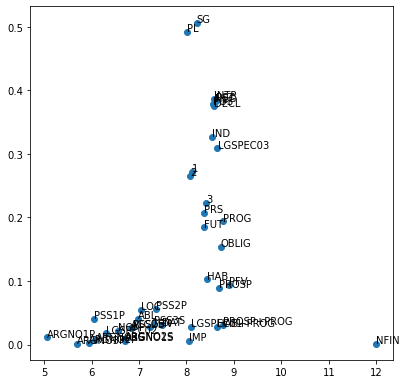

In [19]:
# relationship between average lemma lengths and feature frequencies in the training set
plot_feats(lemma_lens, freqs, feats)

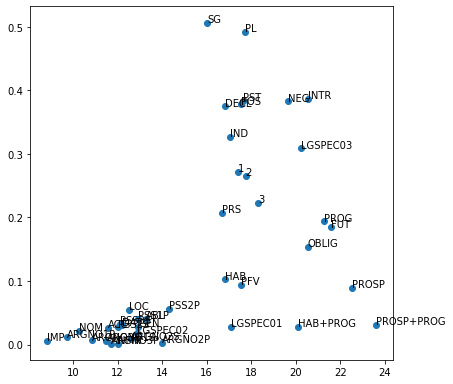

In [20]:
# relationship between average label lengths and feature frequencies in the training set
plot_feats(label_lens, freqs, feats)

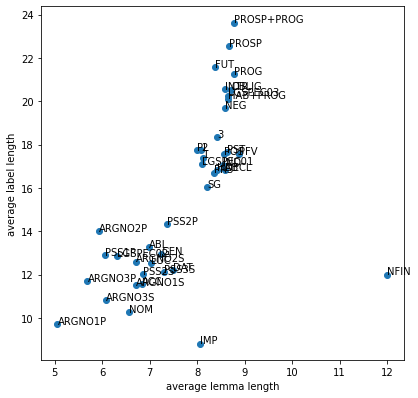

In [21]:
# relationship between average lemma lengths and average label lengths in the training set
plot_feats(lemma_lens, label_lens, feats, 'average lemma length', 'average label length')

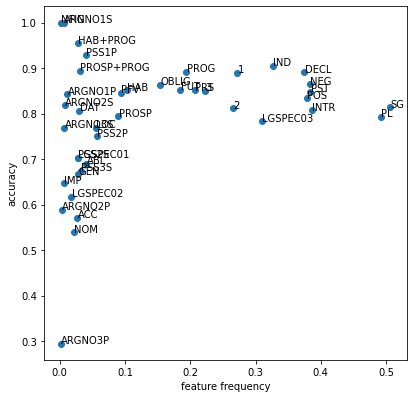

In [22]:
# relationship between the feature frequencies and the accuracies
plot_feats(freqs, accs, feats, 'feature frequency', 'accuracy')

In [23]:
Counter(test_incorrect_feature_list).most_common(10)

[('PL', 206),
 ('SG', 187),
 ('INTR', 139),
 ('LGSPEC03', 136),
 ('POS', 116),
 ('PST', 111),
 ('NEG', 104),
 ('2', 97),
 ('DECL', 81),
 ('3', 71)]

In [24]:
Counter(test_correct_feature_list).most_common(10)

[('SG', 816),
 ('PL', 789),
 ('NEG', 660),
 ('DECL', 659),
 ('PST', 617),
 ('INTR', 581),
 ('POS', 580),
 ('IND', 543),
 ('LGSPEC03', 490),
 ('1', 421)]

In [25]:
acc_rank = Counter({k: (v[1], v[0]) for k, v in Counter(test_feat_acc).items()})

In [26]:
acc_rank.most_common(10)

[('ARGNO1S', (1.0, 0.006142857142857143)),
 ('NFIN', (1.0, 0.0012857142857142856)),
 ('HAB+PROG', (0.9545454545454546, 0.027714285714285716)),
 ('PSS1P', (0.9285714285714286, 0.040285714285714286)),
 ('IND', (0.905, 0.32671428571428573)),
 ('PROSP+PROG', (0.8939393939393939, 0.030714285714285715)),
 ('PROG', (0.8913043478260869, 0.19385714285714287)),
 ('DECL', (0.8905405405405405, 0.3747142857142857)),
 ('1', (0.8900634249471459, 0.27214285714285713)),
 ('NEG', (0.8638743455497382, 0.383))]

In [27]:
acc_rank.most_common()[-10:]

[('PSS2S', (0.7027027027027027, 0.027285714285714285)),
 ('ABL', (0.6891891891891891, 0.04071428571428572)),
 ('PSS3S', (0.6741573033707865, 0.032285714285714286)),
 ('GEN', (0.6666666666666666, 0.027571428571428573)),
 ('IMP', (0.6470588235294118, 0.006285714285714286)),
 ('LGSPEC02', (0.6170212765957447, 0.01757142857142857)),
 ('ARGNO2P', (0.5882352941176471, 0.003142857142857143)),
 ('ACC', (0.5714285714285714, 0.026571428571428572)),
 ('NOM', (0.5394736842105263, 0.02157142857142857)),
 ('ARGNO3P', (0.29411764705882354, 0.0014285714285714286))]